In [110]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

# Load .env enviroment variables
load_dotenv()


True

# Set up alpaca api

In [111]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
#print(f"Alpaca Key type: {type(alpaca_api_key)}")
#print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    'https://paper-api.alpaca.markets',
    api_version="v2")

portfolio = alpaca.get_account()

# list positions and append into lists
refer to https://pypi.org/project/alpaca-trade-api/

In [112]:
# Get a list of all of our positions.
portfolio = alpaca.list_positions()

#lists
tickers = []
shares = []
amount = []

for position in portfolio:
    # Print the quantity of shares for each position.
    print("{} shares of {}".format(position.qty, position.symbol))
    
    #append symbol into tickers
    tickers.append(str(position.symbol)) 
    
    
    #get current price
    price_data = alpaca.get_position(position.symbol).__dict__
    close = float(price_data['_raw']['current_price'])
    qty = float(position.qty)
    
    #append to lists
    amount.append(close * qty)
    shares.append(qty)
    

#print(tickers)
#print(amount)  



0.01 shares of ETHUSD
1 shares of LUNA


# Weight

In [113]:
#sum of total value
sum_portfolio = sum(amount)
weight_list = []

#weight = (total_value of asset / sum) * 100
for i in amount:
    weight_list.append(round(i/sum_portfolio*100, 2))
    
#print(weight_list)

# Create dataframe

In [114]:
zipped = list(zip(shares, amount, weight_list))
#print(zipped)
portfolio = pd.DataFrame(zipped, index=tickers, columns=['No. Shares', 'Total Value', 'Weights'])

portfolio 


,No. Shares,Total Value,Weights
ETHUSD,0.01,34.6885,81.15
LUNA,1.00,8.0600,18.85


<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='Weights'>

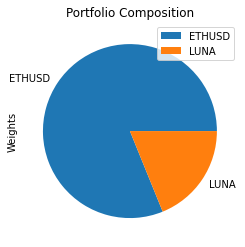

In [115]:
portfolio.plot.pie(y="Weights", title="Portfolio Composition")